# 使用Keras为多类分类开发并验证一个神经网络

## 目录

- [1. 加载数据](#1.-加载数据)
- [2. 显示对比图](2.-显示对比图)
- [3. 数据处理](#3.-数据处理)
- [4. 构建神经网络](#4.-构建神经网络)
- [4. 使用混淆矩阵来验证](#5.-使用混淆矩阵来验证)

# 1. 加载数据


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [90]:
dataset = pd.read_csv('../data/iris.csv', header=None, names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Specials'])

In [12]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Specials
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. 显示对比图

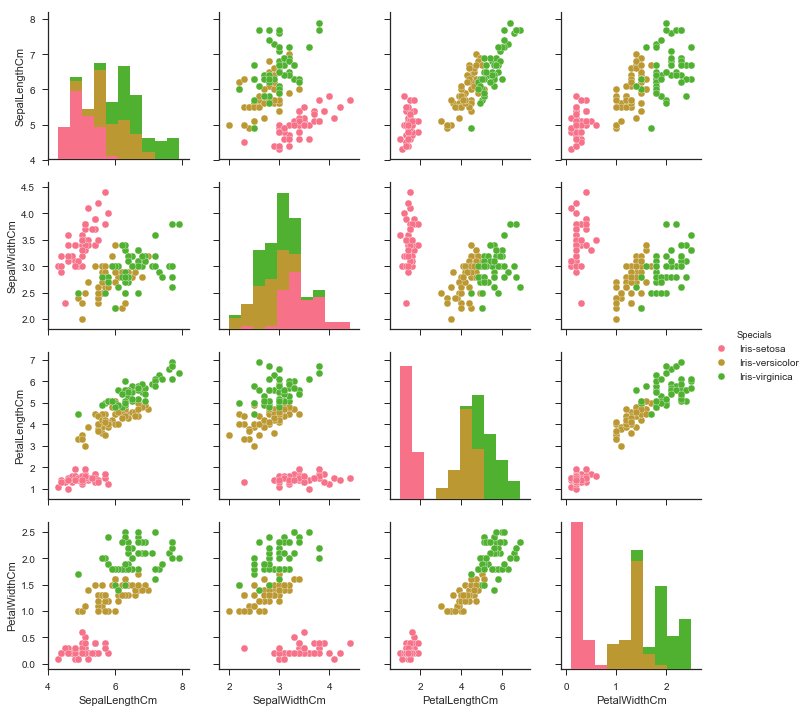

In [20]:
import seaborn as sns

sns.set_style('ticks')
sns.set_palette('husl')
sns.pairplot(dataset.iloc[:,0:5], hue='Specials')


# 3. 数据处理


In [91]:
X = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4].values

In [92]:
dataset.iloc[:,4].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**y** 是字符串，在机器学习中，对于字符串的数据我们要进行处理 (用数字代替)

In [163]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split

encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

# split train and test data set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

# 4. 构建神经网络

In [181]:
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.activations import softmax
from keras import backend

print '----_backend', backend._backend
model = Sequential()
model.add(Dense(20,input_shape=(4,),activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(3,activation='sigmoid'))

model.compile(SGD(lr=0.02),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

----_backend tensorflow
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_137 (Dense)            (None, 20)                100       
_________________________________________________________________
dense_138 (Dense)            (None, 16)                336       
_________________________________________________________________
dense_139 (Dense)            (None, 3)                 51        
Total params: 487
Trainable params: 487
Non-trainable params: 0
_________________________________________________________________


训练模型

In [188]:
results = model.fit(X_train, y_train, epochs=60, verbose=1, shuffle=True)

Epoch 1/60
120/120 [==============================] - 0s 74us/step - loss: 0.2432 - acc: 0.8833
Epoch 2/60
120/120 [==============================] - 0s 87us/step - loss: 0.1441 - acc: 0.9583
Epoch 3/60
120/120 [==============================] - 0s 55us/step - loss: 0.1608 - acc: 0.9500
Epoch 4/60
120/120 [==============================] - 0s 82us/step - loss: 0.1349 - acc: 0.9750
Epoch 5/60
120/120 [==============================] - 0s 82us/step - loss: 0.1594 - acc: 0.9583
Epoch 6/60
120/120 [==============================] - 0s 59us/step - loss: 0.1879 - acc: 0.9333
Epoch 7/60
120/120 [==============================] - 0s 106us/step - loss: 0.1262 - acc: 0.9667
Epoch 8/60
120/120 [==============================] - 0s 79us/step - loss: 0.1763 - acc: 0.9250
Epoch 9/60
120/120 [==============================] - 0s 91us/step - loss: 0.1286 - acc: 0.9583
Epoch 10/60
120/120 [==============================] - 0s 97us/step - loss: 0.1479 - acc: 0.9417
Epoch 11/60
120/120 [=================

In [189]:
y_predict = model.predict(X_test)

y_test_class=np.argmax(y_test, axis=1)
y_predict_class=np.argmax(y_predict, axis=1)

In [190]:
print 'y_predict_mean', y_predict.mean()
print y_test_class
print y_predict_class

y_predict_mean 0.11470772
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [191]:
print y_predict[1]


[9.8687218e-05 3.2844141e-02 2.1681974e-03]


# 5. 使用混淆矩阵来验证

淆矩阵（Confusion Matrix）分析: https://blog.csdn.net/vesper305/article/details/44927047

In [193]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_test_class,y_predict_class, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))
print y_test_class
print y_predict_class
print(confusion_matrix(y_test_class,y_predict_class))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

    avg / total       1.00      1.00      1.00        30

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


从上述 **混淆矩阵** 的结果来看 模型对于预测 "Iris-setosa","Iris-virginica","Iris-virginica" 还是很准确的 (都预测正确了!)

